In [2]:
import nltk
import numpy as np
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import PlaintextCorpusReader
from nltk.text import Text
import re
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image

Similarly to lexical dispersion, you can also plot frequency of terms over time. This is similarly to the Google n-gram visualisation for the Google Books corpus but we will show you how to do something similar for your own corpus.

You first need to import NLTK’s ConditionalFreqDist class from the nltk.probability package. To generate the graph, you have to specify the list of words to be plotted (see targets) and the x-axis labels (in this case the year the inaugural was held which appears at the start of each file: fileid[:4]).

The plot is created by:

    looping through each file (speech)
    then looping through each word in each speech
    then looping though the list of specified target words and
    checking if each target word matches the start of each word in the speeches (after being lower-cased).

The ConditionalFreqDist object (cfd) stores the number of times each of the target words appear in the each of the speaches and the plot() method is used to visualise the graph.

In [8]:
nltk.download('inaugural')

from nltk.corpus import inaugural
from nltk.text import Text

inaugural_tokens=inaugural.words()
inaugural_texts = Text(inaugural_tokens)

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\DIPTO\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


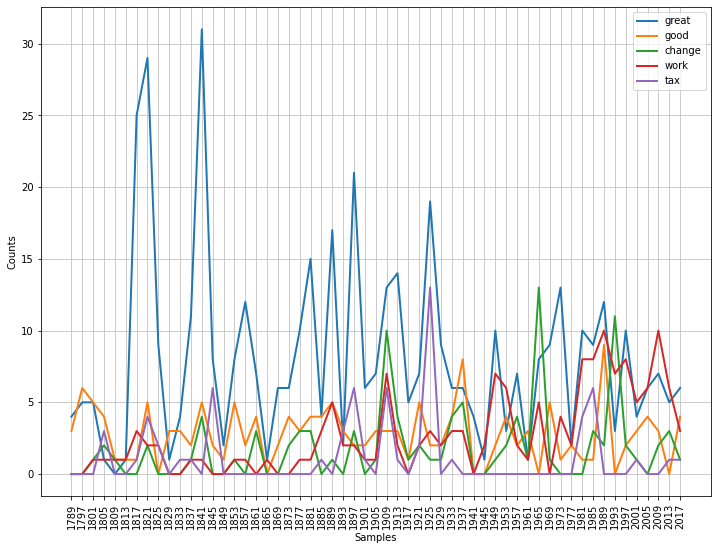

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [11]:
from nltk.probability import ConditionalFreqDist

# type this to set the figure size
plt.rcParams["figure.figsize"] = (12, 9)

targets=['great','good','tax','work','change', 'wom[ae]n']

cfd = nltk.ConditionalFreqDist((target, fileid[:4])
    for fileid in inaugural.fileids()
    for word in inaugural.words(fileid)
    for target in targets
    if word.lower().startswith(target))
cfd.plot()
